## Analysis

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from hurricaneModels import HurricaneModel
from datetime import datetime

In [24]:
atl = pd.read_csv('atl_preproc.csv')
east = pd.read_csv('eastern_preproc.csv')
central = pd.read_csv('central_preproc.csv')

In [25]:
def numPointsPerHurricane(df, n):
    groups = df.groupby(['SID']).size()
    groups = groups.to_dict()
    data_list = []
    
    for keys in groups.keys():
        if groups[keys] >= n:
            #print(keys)
            data_list.append(df[df['SID'] == keys])

    return data_list

In [26]:
l1 = numPointsPerHurricane(atl, 95)
l2 = numPointsPerHurricane(east, 90)
l3 = numPointsPerHurricane(central, 65) 

In [27]:
data_list = l1 + l2 + l3

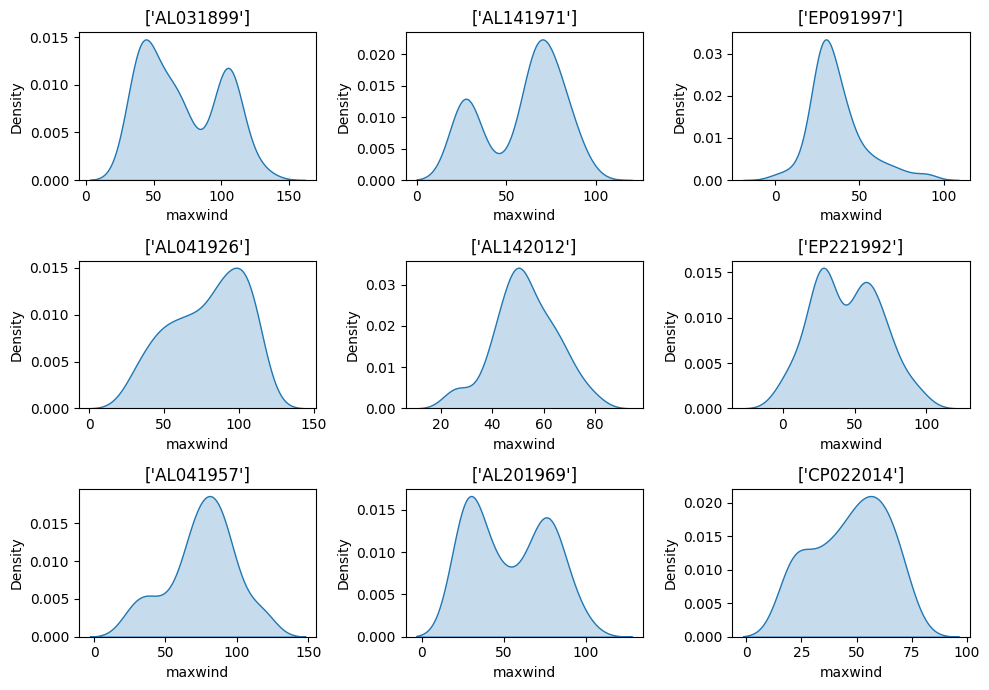

In [28]:
fig, axs = plt.subplots(3,3, figsize = [10,7])
k = 0

for i in range(0, 3):
    for j in range(0, 3):
        axs[j, i].set_title(pd.unique(data_list[k]['SID']))
        sns.kdeplot(x = data_list[k]['maxwind'], 
                        fill = True, 
                        ax = axs[j, i])
        k += 1
plt.tight_layout()

['AL031899'] MSE: 91.94538935566925 MAE: 8.512697060902914 MAPE: 18.842874706186233
['AL041926'] MSE: 569.8298163262612 MAE: 18.612857709612165 MAPE: 32.35325219073793
['AL041957'] MSE: 181.84591245225164 MAE: 9.258892386300223 MAPE: 18.678754710917556
['AL141971'] MSE: 1527.8619613663868 MAE: 29.594712368277616 MAPE: 88.31959450379343
['AL142012'] MSE: 274.44487774718476 MAE: 13.808111463274274 MAPE: 22.955769204244255
['AL201969'] MSE: 478.83445767847866 MAE: 18.34838252597385 MAPE: 45.85432354236454
['EP091997'] MSE: 206.12779095724292 MAE: 11.769200907813179 MAPE: 45.83540506716128
['EP221992'] MSE: 2664.055310642452 MAE: 47.91192224290636 MAPE: 153.00923590953948
['CP022014'] MSE: 169.44283618605246 MAE: 10.909858226776123 MAPE: 26.97472915377888


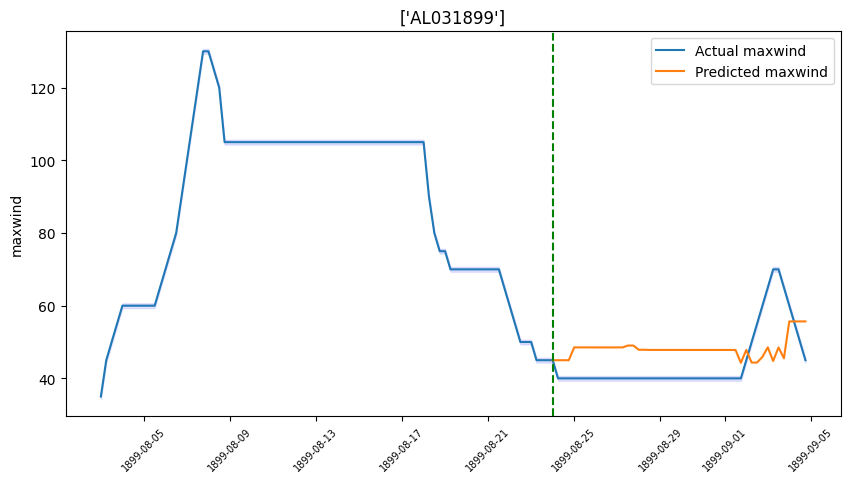

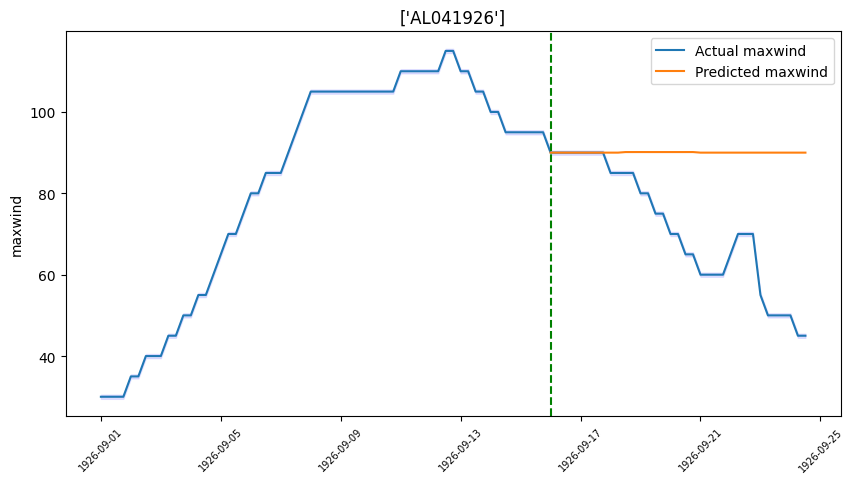

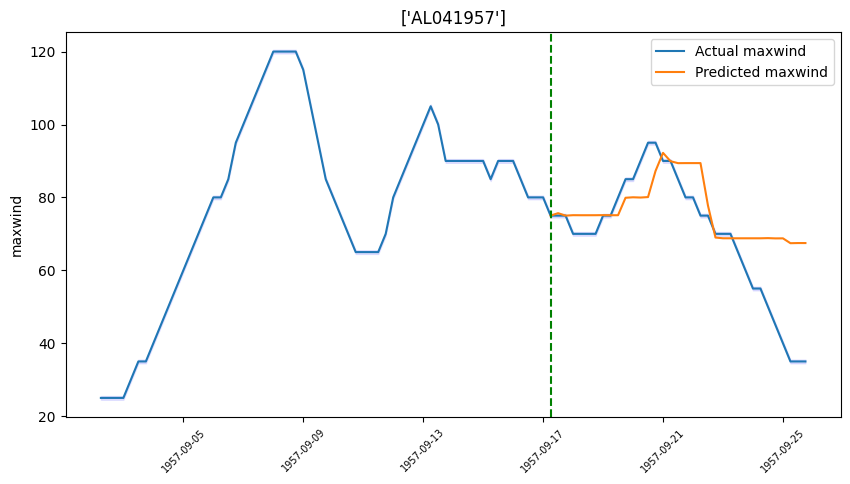

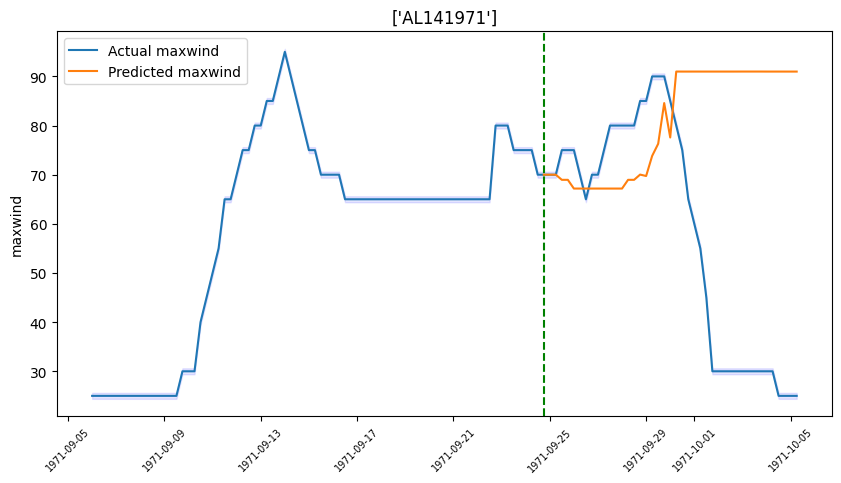

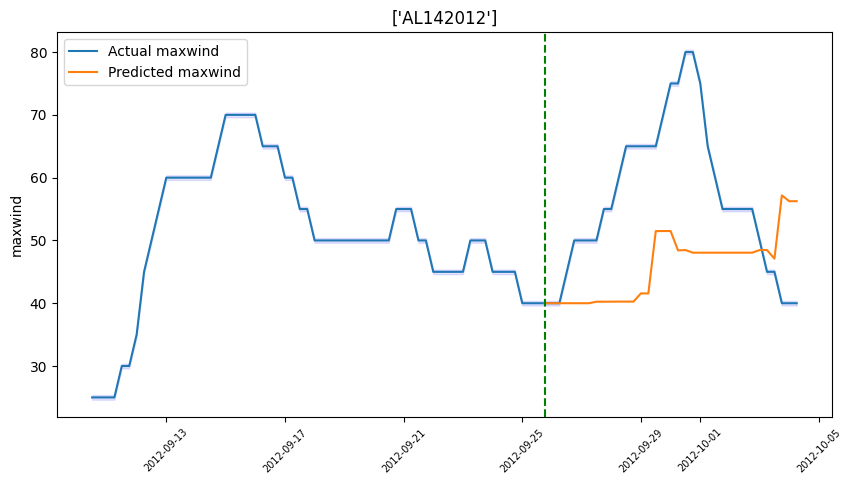

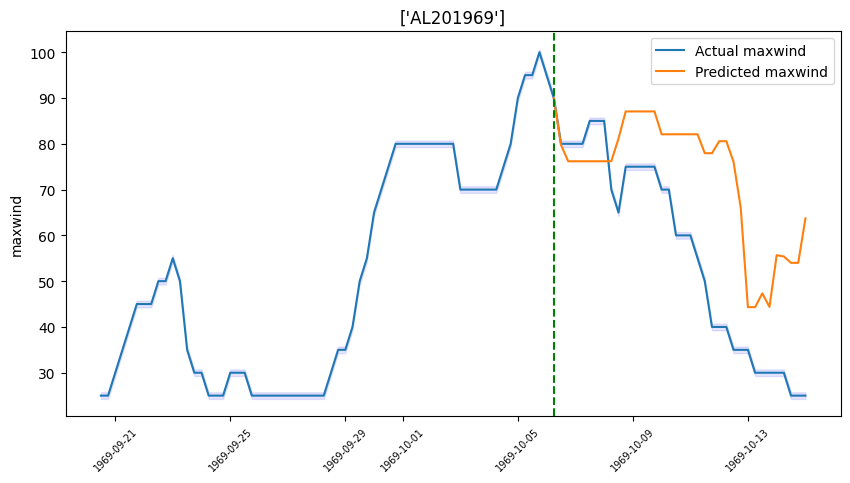

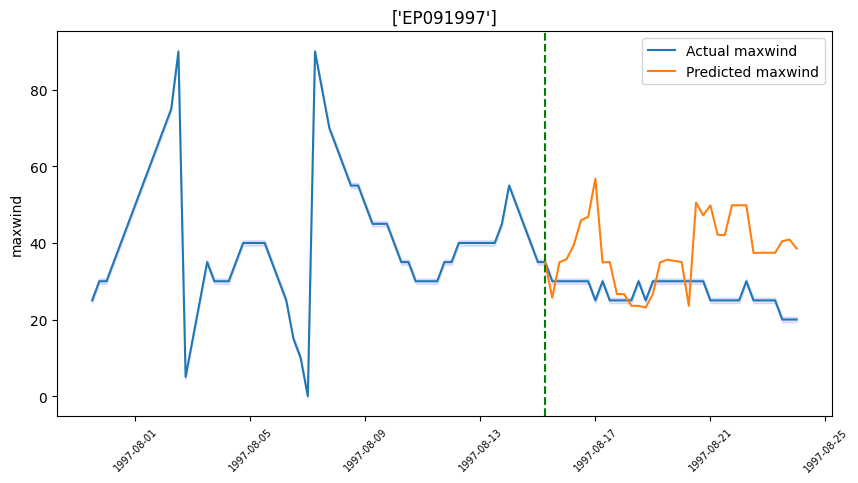

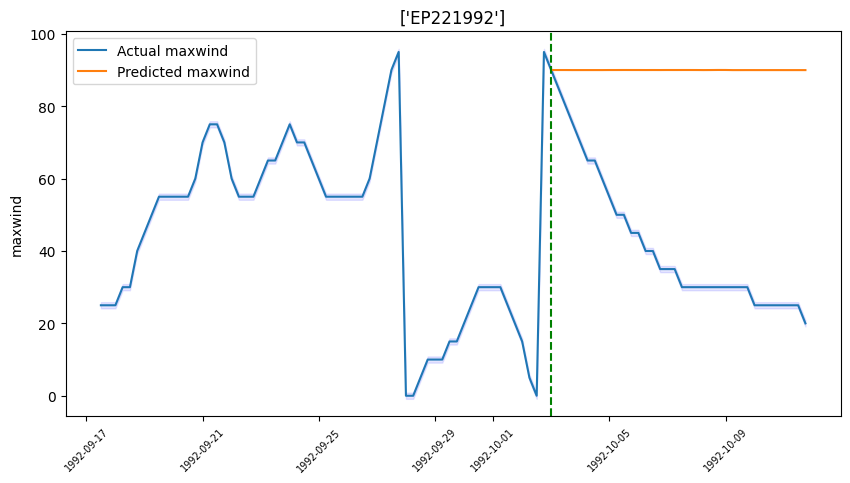

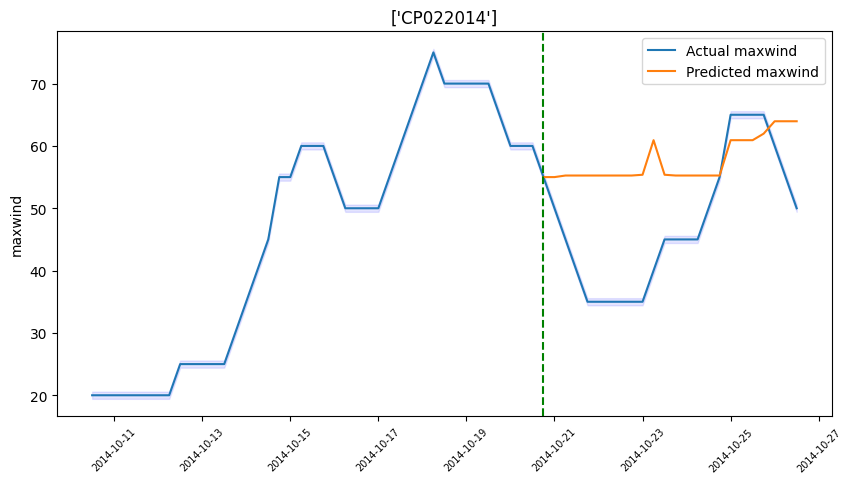

In [33]:
feats = ['lat', 'long', 'dtl', 'distance', 'cum_distance']
target = 'maxwind'
ratio = 0.65

model1 = xgb.XGBRegressor(n_estimators = 100)
model2 = svm.SVR(kernel = 'linear')

for data in data_list:
    data.loc[:, 'date_time'] = pd.to_datetime(data['date_time'])

for data in data_list:
    Hmodel = HurricaneModel(model1, data)
    Hmodel.split_train_predict(ratio, feats, target, True)

In [31]:
data_list[7]

,SID,name,lat,long,maxwind,min_cp,rad_maxwind,eye_diam,pressure_isobar,rad_isobar,stormtype,dtl,date_time,distance,cum_distance
0,EP221992,TINA,10.4,98.5,25,10.0,NaN,NaN,NaN,NaN,Sys,610,1992-09-17 12:00:00,0.000000,0.000000
1,EP221992,TINA,10.5,99.1,25,10.0,NaN,NaN,NaN,NaN,Sys,610,1992-09-17 18:00:00,66.546015,66.546015
2,EP221992,TINA,10.6,99.6,25,10.0,30.0,NaN,11.0,100.0,Sys,611,1992-09-18 00:00:00,55.777282,122.323298
3,EP221992,TINA,10.6,100.1,30,9.0,30.0,NaN,8.0,100.0,Sys,627,1992-09-18 06:00:00,54.648782,176.972079
4,EP221992,TINA,10.7,100.6,30,7.0,30.0,NaN,8.0,100.0,Sys,636,1992-09-18 12:00:00,55.759791,232.731870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,EP221992,TINA,27.6,142.9,25,11.0,NaN,NaN,NaN,NaN,Sys,521,1992-10-10 18:00:00,128.568767,6189.261058
94,EP221992,TINA,28.9,142.9,25,12.0,NaN,NaN,NaN,NaN,Sys,604,1992-10-11 00:00:00,144.553604,6333.814663
95,EP221992,TINA,30.1,143.0,25,12.0,NaN,NaN,NaN,NaN,Sys,679,1992-10-11 06:00:00,133.784579,6467.599242
96,EP221992,TINA,31.5,143.0,25,12.0,NaN,NaN,NaN,NaN,Sys,777,1992-10-11 12:00:00,155.673112,6623.272354
